# Notebook Projet Python - Cryptomonnaies et écologie : la part d'ombre d'une révolution moderne

Inspiré par les objectifs ambitieux de l’Accord de Paris sur le climat issu de la COP21 (2015), plusieurs entreprises privées et ONG internationales des secteurs financiers et énergétiques ont décidé de s’engager pour la création d’un Crypto Climate Accord en mars 2021, initiative soutenue par le Forum Économique mondial (FEM) et l’UNFCC (United Nations Climate Change) visant la neutralité carbone pour les cryptomonnaies à l’horizon 2030. 
Ce projet illustre la prise de conscience progressive par les professionnels du secteur comme par les particuliers de l’impact environnemental fort des cryptomonnaies, du fait de l’explosion de la demande pour celles-ci en une dizaine d’années seulement.  

On désigne par cryptomonnaies un ensemble de monnaies numériques émises de pair à pair, reposant sur une blockchain et dont la création monétaire (le « minage »), ne nécessitant pas l’existence d’une banque centrale, se produit suivant des schémas algorithmiques similaires aux logiques de découverte de l’or : une ressource épuisable, de plus en plus complexe et coûteuse à découvrir, augmentant ainsi sa valeur avec le temps.  
Depuis l’apparition des cryptomonnaies de première génération avec la création du Bitcoin en 2009, et plus encore depuis le premier boom du cours de cette « monnaie » en 2013, le secteur a connu un croissance exceptionnelle, se traduisant à la fois par la multiplication  des cryptomonnaies,  près de 15 617(1) différentes au 14 juin 2021, et par l’augmentation des échanges de celles-ci, pour une valeur totale de 2 031(1) milliards de dollars à cette même date, soit quasiment 90% du PIB français. Actuellement, les 5 principales cryptomonnaies échangées sont : le Bitcoin, l’Ethereum, le Ripple, le Bitcoin cash et le Litecoin.  

Cette croissance du marché des cryptomonnaies, et le fonctionnement même de leur minage, a causé en parallèle un impact écologique de plus en plus lourd. De fait, l’émission, et dans une moindre mesure la diffusion, des différentes cryptomonnaies nécessitant un flux important d’électricité, engendrent ainsi des émissions de carbone fortes pour ce secteur. Ce fait est progressivement admis par l’ensemble des acteurs du marché, comme le montre le Crypto Climate Accord mentionné précédemment ainsi que les nombreux projets autour de l’Ethereum pour réduire drastiquement ses émissions par des évolutions sur sa blockchain(2). Néanmoins, l’ampleur exacte de l’empreinte énergétique des cryptomonnaies semble peu connu du grand public, et notamment des acheteurs, ceci pouvant s’expliquer en partie par la diversité des estimations avancées par de nombreuses sources scientifiques. 

Ainsi, le premier enjeu majeur de notre mémoire sera de quantifier et modéliser précisément cet impact énergétique du minage des cryptomonnaies et de le comparer avec des ordres de grandeur semblables (consommation énergétique d’un pays). 

En allant plus loin, nous chercherons à localiser les régions où sont minées les cryptomonnaies, pour comprendre quels territoires subissent les impacts écologiques de la forte empreinte énergétique. 

Un dernier enjeu clé de la relation entre cryptomonnaies et écologie que nous analyserons sera celui des déchets électroniques créés par le minage, comme les machines ASICs inutilisées dès qu’elles ne sont plus rentables. Angle-mort de nombreuses recherches scientifiques sur le sujet, cette approche nous permettra de développer un autre aspect de l’impact environnemental des cryptomonnaies. 

Finalement : 

>#  Dans quelle mesure les cryptomonnaies, véritable révolution technologique et économique, ont un impact écologique néfaste / lourd ?


(1) : D’après les données de CoinMarketCap, https://coinmarketcap.com/

(2) : Article de The Guardian, Mai 2021 : https://www.theguardian.com/technology/2021/may/19/ethereum-cryptocurrency-to-slash-carbon-emissions

# 0. Importations

In [1]:
!pip install plotly

In [3]:
import numpy as np
from numpy import log

import pandas as pd  
from pandas import json_normalize

import matplotlib.pyplot as plt 
import plotly.express as px

import statistics
import urllib
import bs4

import statsmodels.api as sm
import seaborn as sns
import json

# II. Visualisation du minage de cryptomonnaies 


> <u> II.1 Consommation électrique du Bitcoin en 2019 </u>

D'abord on a cherché a donné un ordre de grandeur à l'électricité consommée par le minage de cryptomonnaie. Pour cela on compare la valeur trouvée dans la première partie à la consommation électrique de différents pays. 

L'objectif fondamental de cette démarche est d'expliciter clairement l'empreinte énergétique des cryptomonnaies, et de faciliter la compréhension de celle-ci. Le fait de comparer cette consommation énergétique avec celle de pays est une démarche empruntée à de nombreux articles scientifiques récents. Cet outil de comparaison a l'avantage de représenter l'ampleur de l'empreinte énergétique des cryptomonnaies.  
 

In [12]:
pays_elec_json="https://raw.githubusercontent.com/GeoffroyENSAE/Cryptomonnaies-et-ecologie/main/pays_electricte_2019.json"
#g = open(pays_elec_json)
#h = json.load(g)

pays_elec=pd.read_json(pays_elec_json)

#On isole le nom du pays et on supprime les colonnes inutiles
pays_elec=pays_elec.join(pays_elec['name'].str.split(',', expand=True).rename(columns={0:'A', 1:'country',2:'C',3:'D'}))
pays_elec= pays_elec.drop(['series_id', 'frequency', 'productid', 'activityid', 'iso','A','C','D','name'],axis=1)

In [13]:
#on récupère la consommation énérgétique du pays 
for i in range(pays_elec.shape[0]):
    pays_elec['data'].iloc[i]=pays_elec['data'].iloc[i][0]['value']
    
#on donne 0 comme valeur lorsque la consommation énergétique n'est pas un nombre pour pouvoir trier les valeurs    
for i in range(227):
    if type(pays_elec['data'].iloc[i])==int :
        pays_elec['data'].iloc[i]=float(pays_elec['data'].iloc[i])
    elif type(pays_elec['data'].iloc[i])!=float :
        pays_elec['data'].iloc[i]=0 

In [14]:
#on ajoute les valeurs du Bitcoin et on trie les valeurs 
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 73.3,'country':'Bitcoin'} , ignore_index=True).sort_values(by = 'data',ascending=False)
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 42.3,'country':'Bitcoin_inf'} , ignore_index=True).sort_values(by = 'data',ascending=False)
pays_elec=pays_elec.append({'unit' : 'BKWH', 'data' : 122.1,'country':'Bitcoin_sup'} , ignore_index=True).sort_values(by = 'data',ascending=False).reset_index(drop=True)


In [15]:
#on ne garde que les pays avec des consommations énergétiques comparables au bitcoin et on ajoute le bitcoin à ce df
new_pays_elec=pays_elec.iloc[30:60,:]

# on réalise ensuite un graphique en barres
plt.figure(figsize=(10,6))
palette=['red' if (x=="Bitcoin_sup"or x=="Bitcoin"or x=="Bitcoin_inf" ) else 'grey' for x in new_pays_elec['country']]
sns.barplot(x=new_pays_elec['country'], y=new_pays_elec['data'], palette=palette)
plt.xlabel('\nPays', fontsize=15, color='#c0392b')
plt.ylabel("électrcité consommée en TWh \n", fontsize=15, color='#c0392b')
plt.title("Consommation d'electricité de différents pays en 2019\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation=90)
plt.tight_layout()


NameError: name 'sns' is not defined

<Figure size 720x432 with 0 Axes>

<b> ANALYSE DU GRAPHIQUE </b> 

Ainsi, nous avons déterminé que l'empreinte énergétique du minage du seul Bitcoin représentait la consommation énergétique de pays comme le Chili (19,2 millions d'habitants, 61ème population mondiale) et la Colombie (51,2 millions d'habitants, 29ème population mondiale), avec une consommation avoisinant les 80 TWh par an.  

Il faut cependant noter qu'il existe une marge d'incertitude par rapport à cette valeur. Par précaution, nous avons donc déterminé une borne supérieure et une borne inférieure pour encadrer la valeur de l'empreinte énergétique déterminée. En prenant en compte ces deux valeurs, la consommation énergétique du Bitcoin serait alors davantage comparable à celle de deux pays du Golfe : les Émirats Arabes Unis pour la borne supérieure, le Qatar pour la borne inférieure. A noter que le Cambridge Bitcoin Electricity Consumption Index (2021), qui s'impose comme les données référentes sur le sujet, a déterminé une empreinte énergétique pour le Bitcoin proche de notre borne supérieure : 124 TWh par an, ce qui place le Bitcoin entre les EUA et la Norvège. 

Dans tous les cas, force est de constater que les ordres de grandeurs comparables à la consommation d'électricité du Bitcoin ne sont pas ceux de pays sous-dévelopées. Cette empreinte énergétique se situe au niveau de celles de pays de l'Union Européenne (Pays-Bas, Belgique, Autriche, Portugual,...), de grands pays densément peuplés d'Amérique du Sud (Argentine, Colombie,...), de pays moins densément peuplés mais très riches (Quatar, EUA,...) et enfin de pays producteurs et exportateurs de nombreuses marchandises du commerce international (Bangladesh, Pakistan,...). 

Cela incarne indubitablement le <b> poids environnemental lourd du minage de Bitcoin </b>, et laisse présager un impact encore plus lourd si l'ensemble des cryptomonnaies minées étaient prises en compte. 

Pour donner une autre représentation et préciser encore l'ampleur de cet impact environnemental néfaste, nous avons décidé de comparer la consommation électrique du Bitcoin en 2019 à celle d'un pays dont l'on connaît bien les modes de vie : la France.  

/var/folders/nl/g373_csn5kx03w80c1r1g7500000gn/T/ipykernel_24354/3250942192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_reduit['data']=pays_reduit['data']/pays_reduit['data'].iloc[0]*100


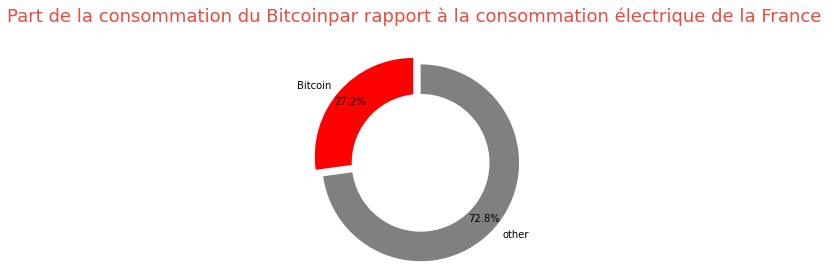

In [8]:
pays_reduit=pays_elec.loc[pays_elec['country'].isin([" France","Bitcoin","Bitcoin_sup","Bitcoin_inf"])]

pays_reduit['data']=pays_reduit['data']/pays_reduit['data'].iloc[0]*100
bitcoin=pays_reduit['data'].iloc[1]

# Pie chart
labels = ['Bitcoin', 'other']
sizes = [bitcoin,100-bitcoin]
colors = ['red','grey']
explode = (0.1,0)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title("Part de la consommation du Bitcoinpar rapport à la consommation électrique de la France \n", fontsize=18, color='#e74c3c')
plt.tight_layout()
plt.show()

<b> ANALYSE DU CAMEMBERT </b>

Cette deuxième représentation montre que la consommation d'électricité du Bitcoin représente 27,2% de la consommation d'électricité française, cette dernière s'élevant à 472 TWh par an, faisant de la France le 10ème pays mondial le plus consommateur d'électricité. Sachant que La consommation française d'électricité par habitant était en 2019 de 7 043 kWh, supérieure de 116 % à la moyenne mondiale : 3 265 kWh, la consommation d'électricité du Bitcoin sur un an représente celle de plus de 11 millions de français. 

Ces données confirment et illustrent l'empreinte énergétique forte des cryptomonnaies, par leur consommation lourde d'électricité. Mais en allant plus loin, comme mentionné dans les enjeux de l'introduction, nous voulons localiser cette consommation d'électricité, pour comprendre quels pays subissent cette alourdissement de leur empreinte énergétique dû au minage des cryptomonnaies. 

> <u> II.2 Evolution du minage par pays 

Pour ce faire, nous avons déterminé les pays où l'on minait le plus de cryptomonnaie et l'évolution de leur hashrates respectifs au cours des deux dernières années. 

En préalable des résultats, nous avons émis plusieurs hypothèses et interrogations quant aux pays où on minerait le plus de Bitcoins : 

- Serait-ce un ensemble de pays sous-developpés, où le prix de l'électricité serait moins cher ? 
- À l'inverse, les grands pays développés, comme la Chine ou les États-Unis, de par leur forte capacité d'investissement et d'innovation technologique, seraient-ils leaders dans ce domaine ? 
- Certains pays sont-ils devenus des centres mondiaux du minage à la suite de choix politiques et économiques, à l'image de ce que proposait le président vénézuélien Nicolas Maduro en 2017, où la lutte contre l'hyperinflation du pesos passait par la création d'une cryptomonnaie nationale ? 

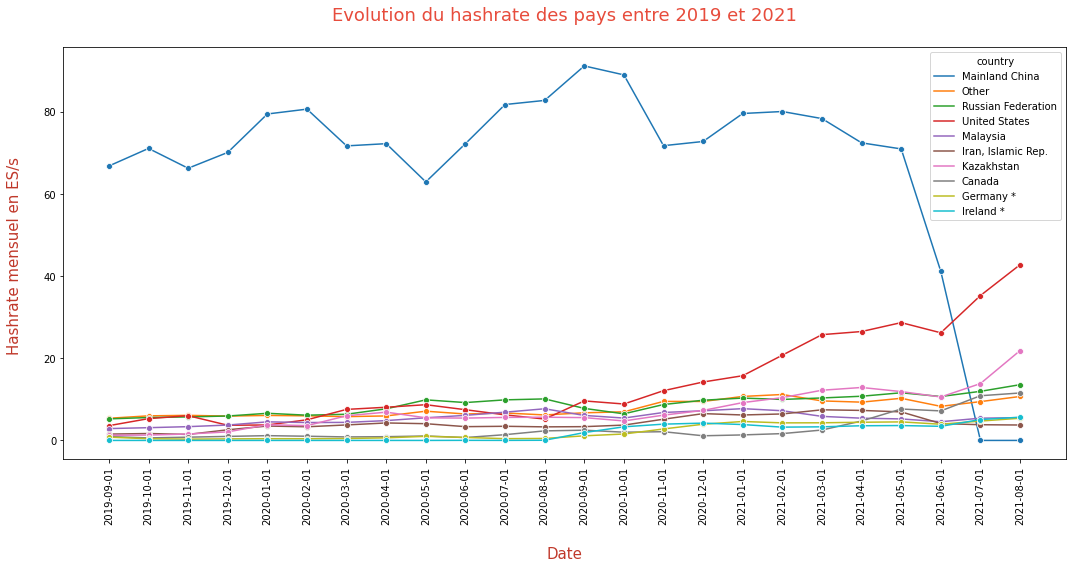

In [9]:
path_pays="https://raw.githubusercontent.com/GeoffroyENSAE/Cryptomonnaies-et-ecologie/main/hashrate_country_2019_2021.csv"
#on charge les données sur le Hashrate par pays
df=pd.read_csv(path_pays,sep=",")

#on représente l'évolution des Hashrates mensuels par pays 
plt.figure(figsize=(15,8))
sns.lineplot(x =df["date"], y = df["monthly_absolute_hashrate_EH/S"],hue = df["country"],  legend="brief", marker='o')

plt.xlabel('\nDate', fontsize=15, color='#c0392b')
plt.ylabel("Hashrate mensuel en ES/s \n", fontsize=15, color='#c0392b')
plt.title("Evolution du hashrate des pays entre 2019 et 2021\n", fontsize=18, color='#e74c3c')

plt.xticks(rotation=90)
plt.tight_layout()


<b> ANALYSE DE L'EVOLUTION DES HASHRATES </b>

Tout d'abord, les pays où l'on mine majoritairement les Bitcoins étaient jusqu'à récemment les deux premières puissances économiques mondiales : la Chine et les États-Unis. Avec un hashrate mensuel oscillant entre 60 et 80 ES/s, la Chine était largement en tête dans ce classement jusqu'en juillet 2021, alors que les États-Unis ne dépassaient pas un hashrate mensuel de 20 ES/s. On trouve aussi parmi les 5 pays de minage le Kazakhstan, la Russie et le Canada. Ces résultats confirment en partie nos deux hypothèses, donnant néanmoins davantage de poids à celle postulant que ce sont les pays les plus développés qui minent le plus, bien qu'on retrouve aussi des pays moins développés, comme le Kazakhstan donc mais aussi l'Iran, où les opportunités de minage sont plus restreintes mais aussi plus rentables 

Cependant, à compter de juin 2021, une décision politique de l'État chinois a complétement rabattu les cartes. Le gouvernement a en effet demandé aux compagnies d'életricité de ne plus fournir les activités de minage de cryptomonnaies, situées principalement dans la région de Sichuan. Si l'argument écologique a été avancé par les autorités, on peut aussi supposer une volonté de contrôler davantage ce type de monnaies décentralisées et universelles créées sur son territoire. Cette quasi-interdiction du minage a entraîné une chute drastique du hashraste mensuel chinois, nul désormais selon les données qui nous sont disponibles. 

Quels pays ont connu une évolution marquante de leur hashrate avec la fin du minage en Chine ? 

Les États-Unis ont déjà connu un boom de leur hashrate mensuel à partir de juin 2021, pour atteindre 40 ES/s, le double de leur score au début de l'année. On peut postuler que les États-Unis vont s'imposer comme le principal pays mineur de Bitcoin avec cet arrêt d'activité de la Chine. Au vu de son évolution récente, le Kazakhstan a aussi bénéficié de cet événement pour s'imposer comme une place forte du minage. 


En conclusion, la consommation d'électricité liée au minage du Bitcoin se concentre principalement sur certaines grandes puissances économiques, comme les États-Unis ou la Russie, bien que d'autres pays moins développés y participent aussi fortement comme le Kzakhstan. De par cette activité, les pays cités subissent un accroissement de leur impact environnemental, l'activité de minage s'ajoutant à l'ensemble des autres activités consommatrices d'électricité. Cet argument écologique a été avancé par la Chine, pour justifier son choix d' "interdire" le minage sur son territoire en 2021, alors qu'elle représentait alors le principal territoire de minage mondial. 

In [10]:
!pip install chart_studio

In [11]:
!pip install chart_studio

## III- Modélisation temporelle de la production de déchets électroniques dus au minage de Bitcoin 

> <b> III.1 - Méthodologie </b>

Tout d’abord, comme mentionné en introduction, la plupart des travaux scientifiques menés sur la problématique de l’impact environnemental des cryptomonnaies s’intéresse à l’empreinte énergétique du minage des cryptomonnaies. Cela se justifie par l’ampleur de cette empreinte énergétique, comparable à la consommation annuelle d’électricité de certains pays comme nous venons de le montrer. Cependant, l’impact environnemental des cryptomonnaies est en réalité pluriel, et nous allons ici explorer un des aspects moins connus de la pollution des cryptos : les déchets électroniques créés par le minage de cryptomonnaies, autrement dit l’ensemble des machines qui sont hors service pour miner. 

 Angle-mort de nombreuses études sur l’impact environnemental des cryptomonnaies, ce sujet a été traité récemment par A. De Vries et C.Stoll, dans leur article « Bitcoin’s growing e-waste problem », publié en Septembre 2021 dans le journal « Ressources, Conservation and Recycling »(1). Nous nous sommes inspirés de leur démarche pour créer un modèle de la production de déchets électroniques liés au minage de Bitcoin, seule cryptomonnaie étudiée par l’article mais aussi la plus populaire ce qui donne un véritable poids aux estimations. Nous nous appuierons sur la même base de données que celle de l’article(2), données publiques disponibles librement, présentent différentes machines de minage de Bitcoin et leurs caractéristiques (date de sortie, efficience énergétique, hashrate, puissance, poids). Nous aurions pu repartir de la base de données déjà utilisées précédemment dans le I, cependant une informations clé n’y était pas présente : le poids des machines. Bien que nous avons pensé dans un premier temps à joindre les deux bases, cela a été rendu complexe par le fait que les machines de minage présentes dans les deux bases étaient largement différentes. 


> <b>III.2 - Fonctionnement du modèle </b>

L’hypothèse fondamentale du modèle est que tant qu’une machine de minage est rentable, elle est conservée. Pour estimer cette rentabilité, imitant la démarche d’A.de Vries et C.Stoll, nous nous sommes intéressés aux <b> efficacités énergétiques </b> des machines et du réseau en général. Notion-clé en économie comme en thermodynamique, l’efficacité énergétique désigne ici le rapport entre ce que rapporte économiquement la machine (nombre de bitcoins vendus) et ce que cela coûte énergiquement (quantité d’électricité dépensée pour le minage). Si l’efficacité énergétique de chaque machine i est indiquée dans notre base de données (EE(i), en J / TH), il a fallu calculer celle du réseau correspondant au seuil de rentabilité de celui-ci, nommé BE*. Le calcul de cette variable, d’après la définition de l’efficacité énergétique, se fait comme suit :  

> <i> BE*  = (( BTCday . M ) / p.PUE.PA.24hrday) / (H .1000)

- <i> BTCday </i> = Total network rewards + fees for a given day, in Bitcoin [BTC]    
- <i> M </i> : Prix du marché, en US Dollar par Bitcoin [USD/BTC]
- <i> p </i> : Coût pour un kWh d’électricité consommé, en US Dollar par kilowatt- hour [USD/kWh] 
- <i> H </i> = Estimated network hashrate, in Terahash per second [TH/s)
- <i> PA </i> = Performance adjustment factor : Facteur exogène (égal à 1,05) 
- <i> PUE </i> = Power usage effectiveness factor : Facteur exogène 

> L’idée est qu’une machine est rentable tant que son efficacité énergétique est inférieure à celle du réseau correspondant au seuil de rentabilité : tant que <i> EE(i) ≤ BE*.

Nous cherchons donc dans un premier temps à modéliser l’efficacité énergétique correspondant au seuil de rentabilité du réseau. Une fois cette courbe obtenue, nous pouvons déterminer la durée de vie de chaque machine. Sur cette deuxième figure, chaque point jaune correspond à l’efficacité énergétique d’une machine de minage en particulier. Tant que la droite horizontale passant par ce point ne croise pas la courbe associée au seuil de rentabilité, alors la i-ième machine est rentable, son efficacité énergétique étant inférieure à celle de la rentabilité. L’écart entre la date de sortie et la date où la droite horizontale coupe la courbe du seuil de rentabilité (i.e <i>EE(i) = BE*</i>) donne <b>l’espérance de vie d’une machine </b>. 

> Avec cette espérance de vie de chaque machine, et le poids de ces dernières, variable décisive présente dans notre base de données, on peut déterminer le poids d’équipements de minage jetés au fur et à mesure du temps : on obtient donc la <b> quantité des déchets électroniques </b> causée par le minage de Bitcoins.

> <b> III.3 - Interprétation des résultats </b>



> <b> III.3 - Limites du modèle </b>

2 limites principales identifiées : 

- Hypothèse fondamentale du modèle : les machines qui ne sont plus rentables sont hors-service et deviennent des déchets électroniques. Or, on pourrait supposer une ré-utilisation de l’ensemble ou d’une partie des machines de minage, voire même un recyclage de celles-ci. Inconvénient de ce point : recherche scientifique extrêmement faible sur ces pratiques. 

- Modèle centré uniquement sur les bitcoins. Certes, c’est la crypto la plus échangée et la plus miné, mais il pourrait être intéressant d’étendre cette analyse à un nombre plus élevé de crypto pour avoir une estimation plus précise de l’impact environnemental des déchets électroniques liées aux cryptos. La solution serait d’avoir une base de données plus larges, mais celle-ci est complexe à établir, à cause de l’importance du nombre de machines de minages et des crypto monnaies différents. 